In [1]:
# Import necessary libraries and modules
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing and model selection tools
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [2]:
# Set the file path and load the dataset
file_path = os.path.join(os.getcwd(), 'diabetes_prediction_dataset.csv')
data = pd.read_csv(file_path)

# Display the first 10 rows of the dataset
data.head(10)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
# Check for missing values in each column
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# Get  information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [9]:
# Count and display the number of occurrences of each data type in the dataset
type_counts = data.dtypes.value_counts()
print("\nNumber of each data type:")
print(type_counts)



Number of each data type:
int64      4
float64    3
object     2
Name: count, dtype: int64


In [10]:
# Identify and categorize columns by their data types
column_types = data.dtypes

# Get lists of numeric, integer, and object (categorical/string) columns
numeric_columns = column_types[column_types == 'float64'].index.tolist()
integer_columns = column_types[column_types == 'int64'].index.tolist()
object_columns = column_types[column_types == 'object'].index.tolist()

# Print the categorized column names
print("Numeric columns (float64):", numeric_columns)
print("Integer columns (int64):", integer_columns)
print("Object columns (Categorical/String):", object_columns)


Numeric columns (float64): ['age', 'bmi', 'HbA1c_level']
Integer columns (int64): ['hypertension', 'heart_disease', 'blood_glucose_level', 'diabetes']
Object columns (Categorical/String): ['gender', 'smoking_history']


In [11]:
data.shape

(100000, 9)

### labe encoder 

In [12]:
['gender', 'smoking_history']

['gender', 'smoking_history']

In [13]:
# Calculate and display the number of unique values in each column of the dataset
unique_values_per_column = data.nunique()

# Print the unique value counts for each column
print("Number of unique values in each column:")
print(unique_values_per_column)


Number of unique values in each column:
gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64


In [14]:
# Remove rows where the 'gender' column has the value 'Other'
data = data[data['gender'] != 'Other']

# Print the unique values in the 'gender' column after filtering
print(data['gender'].unique())


['Female' 'Male']


In [15]:
# Initialize LabelEncoder and transform categorical columns into numeric values
lbl = LabelEncoder()

# Encode the 'gender' and 'smoking_history' columns as numeric values
data['gender'] = lbl.fit_transform(data['gender'])
data['smoking_history'] = lbl.fit_transform(data['smoking_history'])


In [16]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


### visualisation

In [17]:
corr_with_price = data.corr()['diabetes'].sort_values(ascending=False)
corr_with_price

diabetes               1.000000
blood_glucose_level    0.419587
HbA1c_level            0.400696
age                    0.257999
bmi                    0.214377
hypertension           0.197811
heart_disease          0.171718
smoking_history        0.094328
gender                 0.037623
Name: diabetes, dtype: float64

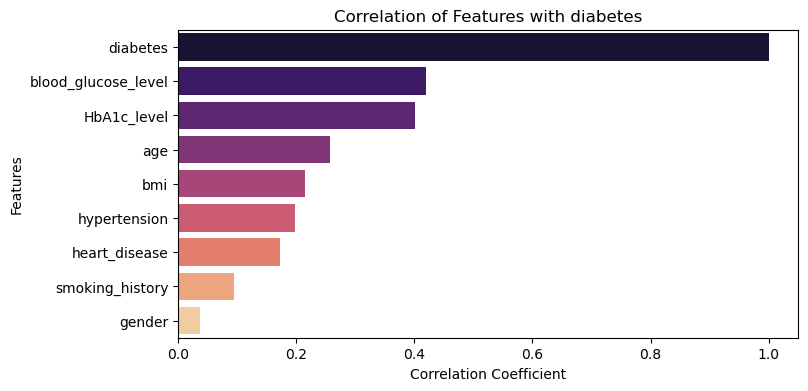

In [18]:

# corelation
corr_with_diabetes = data.corr()['diabetes'].sort_values(ascending=False)

#  barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=corr_with_diabetes.values, y=corr_with_diabetes.index, palette='magma')


plt.title('Correlation of Features with diabetes')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

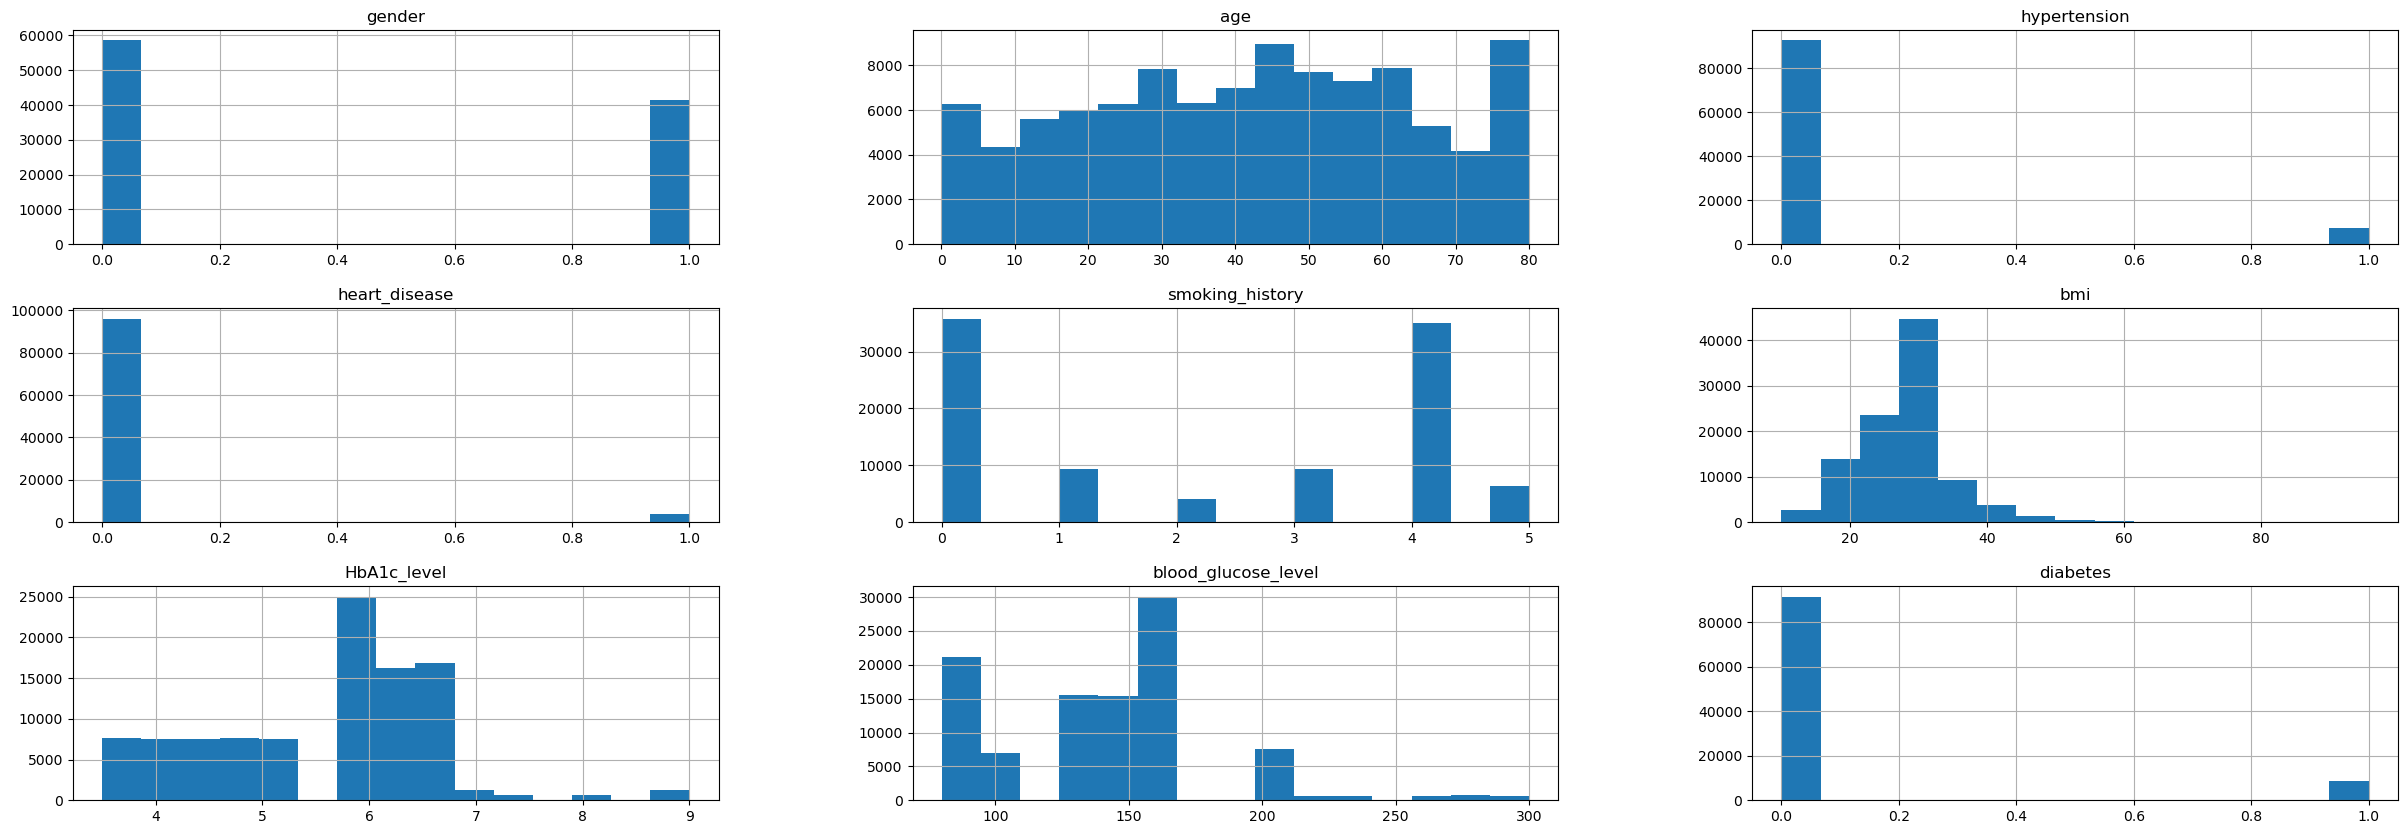

In [19]:
## Histogram Distribution of Numerical Variables in Dataset
data.hist(bins=15, figsize=(30,10))
plt.show()

## 

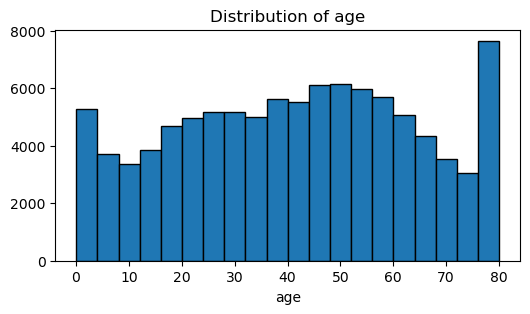

In [20]:
plt.figure(figsize=(6, 3))
plt.hist(data['age'], bins=20, color=None, edgecolor='black')
plt.title('Distribution of age')
plt.xlabel('age')
plt.show()

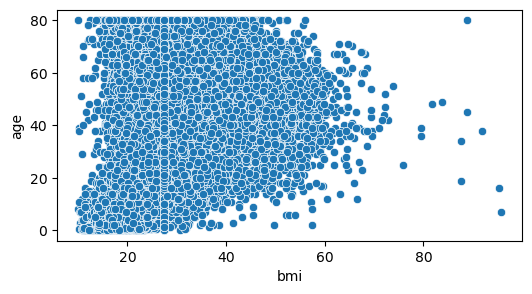

In [22]:


plt.figure(figsize=(6, 3))
sns.scatterplot(x='bmi', y='age', data=data)
plt.show()


C:\Users\MHMD RAGAB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


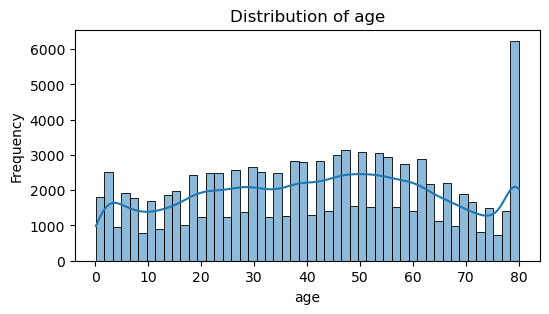

In [25]:


plt.figure(figsize=(6, 3))
sns.histplot(data['age'], bins=50, kde=True)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()


### featur engenring 

In [27]:
# Display correlation of features with 'diabetes'
data.corr()['diabetes'].sort_values(ascending=False)


diabetes               1.000000
blood_glucose_level    0.419587
HbA1c_level            0.400696
age                    0.257999
bmi                    0.214377
hypertension           0.197811
heart_disease          0.171718
smoking_history        0.094328
gender                 0.037623
Name: diabetes, dtype: float64

In [28]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [29]:
# Create new feature by combining blood glucose level, HbA1c level, and gender
data['glucose_HbA1c_gender_interaction'] = data['blood_glucose_level'] * data['HbA1c_level'] + data['gender']

# Apply log transformation to blood glucose level and age, and create a new feature
data['log_glucose_age'] = np.log1p(data['blood_glucose_level'] + data['age'])

# Create a new feature by multiplying HbA1c level and age
data['HbA1c_age_interaction'] = data['HbA1c_level'] * data['age']

# Create a new feature by multiplying glucose level and age
data['glucose_age_interaction'] = data['blood_glucose_level'] * data['age']

# Create a new feature by multiplying glucose level and BMI
data['glucose_bmi_interaction'] = data['blood_glucose_level'] * data['bmi']

# Check the correlation of new features with 'diabetes'
data.corr()['diabetes'].sort_values(ascending=False)


diabetes                            1.000000
glucose_HbA1c_gender_interaction    0.565119
glucose_bmi_interaction             0.463478
glucose_age_interaction             0.462286
blood_glucose_level                 0.419587
HbA1c_age_interaction               0.410627
HbA1c_level                         0.400696
log_glucose_age                     0.399733
age                                 0.257999
bmi                                 0.214377
hypertension                        0.197811
heart_disease                       0.171718
smoking_history                     0.094328
gender                              0.037623
Name: diabetes, dtype: float64

### model train

In [30]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('diabetes', axis=1)  # Drop the 'diabetes' column from features
y = data['diabetes']  # Target variable is the 'diabetes' column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Initialize the StandardScaler to standardize features
scaler = StandardScaler()


In [32]:
# Scale the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
# Initialize and train a RandomForestClassifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
# Make predictions on the test data using the trained RandomForestClassifier
y_pred_rand_clas = clf.predict(X_test)


In [35]:
# Calculate and print the accuracy of the RandomForestClassifier model
accuracy = accuracy_score(y_test, y_pred_rand_clas)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 96.90%


In [36]:
# Print the classification report to evaluate precision, recall, and F1-score
print(classification_report(y_test, y_pred_rand_clas))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.94      0.69      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.96      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



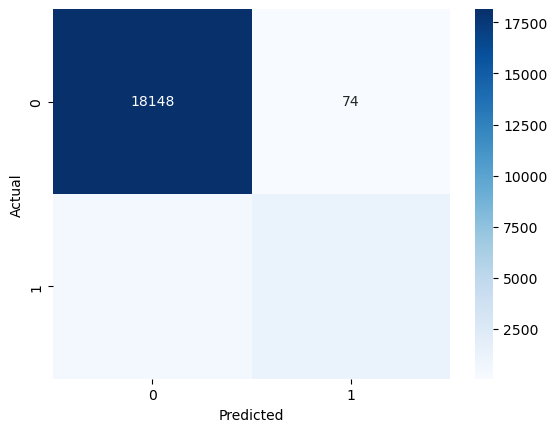

In [37]:
# Generate and display the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred_rand_clas)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Display confusion matrix with annotations
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [38]:
# Initialize and train a GradientBoostingClassifier with 100 estimators
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [39]:
# Predict using the trained GradientBoostingClassifier
y_pred_gb = gb_model.predict(X_test)


In [40]:
# Print the classification report for the Gradient Boosting model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.99      0.68      0.81      1775

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.90     19997
weighted avg       0.97      0.97      0.97     19997



In [41]:
# Calculate and print the accuracy of the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb}")


Accuracy: 0.9711456718507776


### SVM

In [42]:
# Initialize and train a Support Vector Classifier (SVC) model
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [43]:
# Make predictions using the trained SVC model and print the classification report
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18222
           1       0.99      0.59      0.74      1775

    accuracy                           0.96     19997
   macro avg       0.97      0.80      0.86     19997
weighted avg       0.96      0.96      0.96     19997



In [44]:
# Calculate and print the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}")


Accuracy: 0.9630444566685002
